# 1D Mainen and Sejnowski 1995

https://redwood.berkeley.edu/wp-content/uploads/2018/08/mainen-sejnowski.pdf

<img align="center"        
 src="https://camo.githubusercontent.com/77f4a48a0fe8f98ffab3c1f21dca1e74286b14d47c17120ee9627f3351fcd5e7/687474703a2f2f692e737461636b2e696d6775722e636f6d2f69786e727a2e706e67" width="700" height="700" />

- replication of the experimental procedure in Mainen and Sejnowski 1995
- injecting a DC or noise current in cells and recording their firing rates and voltages
- this computational replication is a exemplificative model, not an exact replication of the paper 

In [37]:
# fileName

fileName = '1D_MainenSejnowski1995'

In [38]:
# libs

import pyNN.nest as sim
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt


In [39]:
# simulation settings


sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 1000 # [ms+]


In [40]:
# make the network

cell = {}
cell['DC'] = sim.Population(
                        1,
                        sim.IF_cond_exp,
                        cellparams=sim.IF_cond_exp.default_parameters,
                        structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                        initial_values = {'v': np.random.uniform(low=-70, high=-60)},
                        label=None,
                    )

cell['noise'] = sim.Population(
                        1,
                        sim.IF_cond_exp,
                        cellparams=sim.IF_cond_exp.default_parameters,
                        structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                        initial_values = {'v': np.random.uniform(low=-70, high=-60)},
                        label=None,
                    )


cell['DC'].record(['spikes', 'v'])
cell['noise'].record(['spikes', 'v'])

NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


In [41]:
# make the currenct input injection

# direct current
pulse = sim.DCSource(amplitude=1, #195pA, 0.195nA
                     start = 20.0, #ms
                     stop=simtime-20)

pulse.inject_into(cell['DC'])


# noise
noise = sim.NoisyCurrentSource(mean=0.75,
                               stdev=1.0,
                               start=20.0,
                               stop=simtime-20,
                               dt = 1.0)
cell['noise'].inject(noise)

In [42]:
# run simulation

sim.run(simtime) 

1000.0

In [43]:
# save the results

outputs = {}
for i in ['DC', 'noise']:
    outputs[i] = cell[i].get_data()
    
    for recording in ['v', 'spikes']:
        cell[i].write_data(fileName + '_' + str(recording) + '.pkl')


In [44]:
# recover results function

def recover_results(outputs):
    results = {}
    for key in outputs.keys(): # to extract the name of the layer, e.g., Exc, Inh, Thalamus, etc  
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results


In [45]:
# recover results

results = recover_results(outputs)
results.keys()

v
v


dict_keys([('DC', 'v'), ('DC', 'spikes'), ('noise', 'v'), ('noise', 'spikes')])

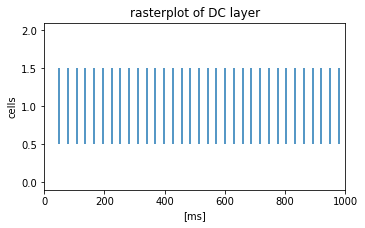

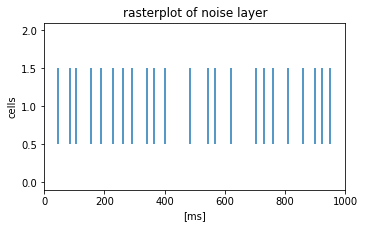

In [46]:
# check the spikes


fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes

for idx, value in enumerate(['DC']):
    axes_list[idx].eventplot(results[value, 'spikes'])
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(0, simtime)

fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes    
for idx, value in enumerate(['noise']):
    axes_list[idx].eventplot(results[value, 'spikes'])
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(0, simtime)

In [47]:
# check the mean firing rate

print("Mean firing rate cell['DC']: ", cell['DC'].mean_spike_count() * 1000.0 / simtime, "Hz")
print("Mean firing rate cell['noise']: ", cell['noise'].mean_spike_count() * 1000.0 / simtime, "Hz")

Mean firing rate cell['DC']:  33.0 Hz
Mean firing rate cell['noise']:  23.0 Hz


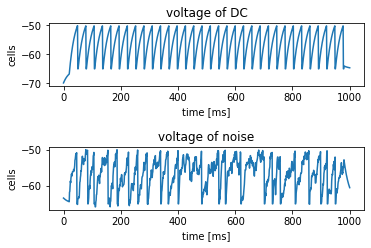

In [48]:
# check the voltage


fig, axes = plt.subplots(2, 1)#, figsize=(9,5))
fig.tight_layout(pad=4)

axes_list = fig.axes

for idx, value in enumerate(['DC', 'noise']):
    im = axes_list[idx].plot(results[value, 'v'])
    axes_list[idx].set_title('voltage of ' + str(value))
    axes_list[idx].set_xlabel('time [ms]')
    axes_list[idx].set_ylabel('cells')


In [49]:
# end simulation

sim.end()